Introducción del proyecto: se analizarán los viajes de la compañía de taxis el 15 y 16 de noviembre par determinar cuáles son los barrios principales por el número de finalizaciones, duración promedio de los viajes

In [1]:
# Importa pandas para el manejo de los DataFrame
import pandas as pd
# Importa numpy para
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#cargar los datos:
company_trips = pd.read_csv("/datasets/project_sql_result_01.csv")
location_average = pd.read_csv("/datasets/project_sql_result_04.csv")
duration_trip = pd.read_csv ("/datasets/project_sql_result_07.csv")



In [3]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [5]:
#contar los valores ausentes
print(company_trips.isna().sum())

company_name    0
trips_amount    0
dtype: int64


In [6]:
#contar valores duplicados
duplicados = company_trips['company_name'].duplicated().sum()

print(f"Número de duplicados en 'company_name': {duplicados}")

Número de duplicados en 'company_name': 0


In [7]:
print(company_trips["company_name"].tail)

<bound method NDFrame.tail of 0                           Flash Cab
1           Taxi Affiliation Services
2                   Medallion Leasing
3                          Yellow Cab
4     Taxi Affiliation Service Yellow
                   ...               
59       4053 - 40193 Adwar H. Nikola
60            2733 - 74600 Benny Jona
61      5874 - 73628 Sergey Cab Corp.
62         2241 - 44667 - Felman Corp
63        3556 - 36214 RC Andrews Cab
Name: company_name, Length: 64, dtype: object>


se puede hallar que en la tabla company_trips, no existen valores ausentes, no hay datos duplicados, pero si se puede observar que en la columna de nombre de companía existen números, tal vez sean número de ID, que se mezclaron, por ello se creará la columna de ID

In [8]:
# Extraer los números de la columna 'company_name' y crear la nueva columna 'company_id'
company_trips['company_id'] = company_trips['company_name'].str.extract('(\d+)')

# Mostrar el DataFrame actualizado
print(company_trips)

                       company_name  trips_amount company_id
0                         Flash Cab         19558        NaN
1         Taxi Affiliation Services         11422        NaN
2                 Medallion Leasing         10367        NaN
3                        Yellow Cab          9888        NaN
4   Taxi Affiliation Service Yellow          9299        NaN
..                              ...           ...        ...
59     4053 - 40193 Adwar H. Nikola             7       4053
60          2733 - 74600 Benny Jona             7       2733
61    5874 - 73628 Sergey Cab Corp.             5       5874
62       2241 - 44667 - Felman Corp             3       2241
63      3556 - 36214 RC Andrews Cab             2       3556

[64 rows x 3 columns]


In [9]:
#ahora se rellenan los valores ausentes de la columna company_id

company_trips['company_id'].fillna(0, inplace=True) 

In [10]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
 2   company_id    64 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
company_trips

,company_name,trips_amount,company_id
0,Flash Cab,19558,0
1,Taxi Affiliation Services,11422,0
2,Medallion Leasing,10367,0
3,Yellow Cab,9888,0
4,Taxi Affiliation Service Yellow,9299,0
...,...,...,...
59,4053 - 40193 Adwar H. Nikola,7,4053
60,2733 - 74600 Benny Jona,7,2733
61,5874 - 73628 Sergey Cab Corp.,5,5874
62,2241 - 44667 - Felman Corp,3,2241


In [12]:
location_average 

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [13]:
#contar los valores ausentes
print(location_average.isna().sum()) # no se hallaron valores ausentes en el dataframe

dropoff_location_name    0
average_trips            0
dtype: int64


In [14]:
#contar valores duplicados
duplicados = location_average['dropoff_location_name'].duplicated().sum()

print(f"Número de duplicados en 'dropoff_location_name': {duplicados}")

Número de duplicados en 'dropoff_location_name': 0


In [15]:
#convertir la columna average_trips en int
location_average["average_trips"]= location_average["average_trips"].astype("int")

In [16]:
location_average

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


In [17]:
duration_trip

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [18]:
#contar los valores ausentes
print(duration_trip.isna().sum()) # no se hayaron valores ausentes

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [19]:
#convertir tipo de datos start ts a datetime
duration_trip['start_ts'] = pd.to_datetime(duration_trip['start_ts'], format='%Y-%m-%d')

In [20]:
duration_trip

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


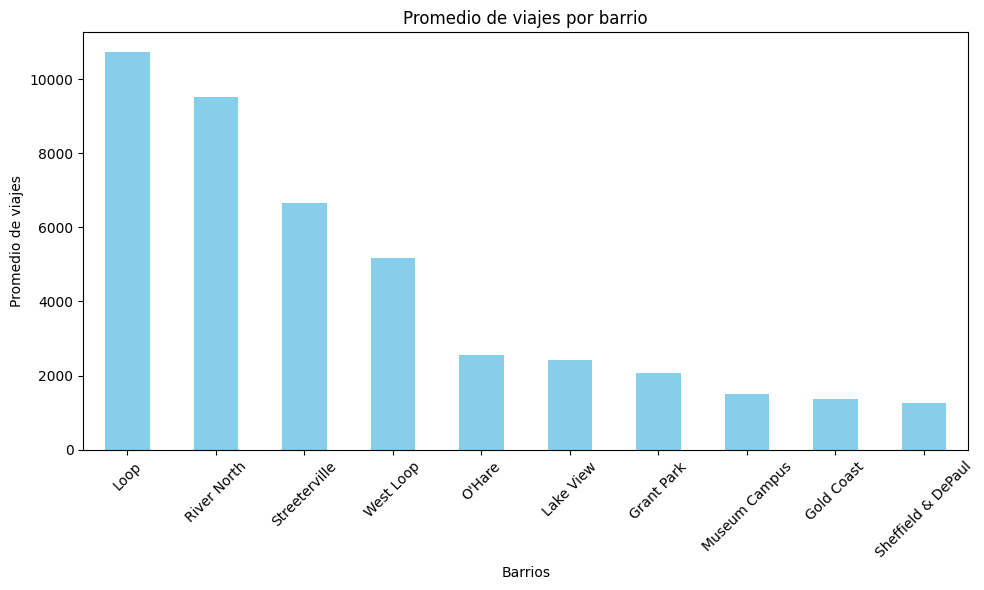

In [21]:
# se observara los 10 primeros barrios en términos de finalizacion 
# Calcular el promedio de viajes por barrio y ordenar de forma descendente
average_trips_per_neighborhood = (
    location_average.groupby('dropoff_location_name')['average_trips']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Crear la gráfica
plt.figure(figsize=(10, 6))
average_trips_per_neighborhood.plot(kind='bar', color='skyblue')

plt.title('Promedio de viajes por barrio')
plt.xlabel('Barrios')
plt.ylabel('Promedio de viajes')

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajustar la gráfica para que no se corten las etiquetas
plt.show()

se puede observar que el barrio que tiene más viajes en promedio es loop, rebasando las 10,000 frecuencias, seguido de Rivera North, casi llegando a las 10,000, se puede observar que a apartir de O´Hare los viajes promedio descenden casi a 2000 

conlusiones: hay una diferencia de 2016 entre West Loop a O´hare, dando un 26% de diferencia entre viajes, los tres primeros barrios hacen; los 3 primeros barrios: loop, river north y streeterville explican el 30% de los viajes de todo el data frame.


In [28]:
import pandas as pd
import numpy as np
from scipy import stats
#Prueba de hipótesis para los días lluevioso
# Filtrar los sábados
duration_trip['day_of_week'] = duration_trip['start_ts'].dt.day_name()
saturdays = duration_trip[duration_trip['day_of_week'] == 'Saturday']

# Filtrar los sábados lluviosos
rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Bad']

# Calcular la duración promedio de los viajes en sábados lluviosos
mean_rainy_saturdays = rainy_saturdays['duration_seconds'].mean()

# Calcular la duración promedio de los viajes en otros días (no sábados)
other_days = duration_trip[duration_trip['day_of_week'] != 'Saturday']
mean_other_days = other_days['duration_seconds'].mean()

# Establecer el nivel de significación
alpha = 0.15

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(
    rainy_saturdays['duration_seconds'],
    other_days['duration_seconds'],
    equal_var=False
)

# Imprimir resultados
print(f'Duración promedio en sábados lluviosos: {mean_rainy_saturdays:.2f} segundos')
print(f'Duración promedio en otros días: {mean_other_days:.2f} segundos')
print(f'Estadística t: {t_stat:.2f}')
print(f'Valor p: {p_value:.4f}')

# Decisión sobre la hipótesis
if p_value < alpha:
    print('Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.')
else:
    print('No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia los sábados lluviosos.')

Duración promedio en sábados lluviosos: 2427.21 segundos
Duración promedio en otros días: nan segundos
Estadística t: nan
Valor p: nan
No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia los sábados lluviosos.


In [26]:
duration_trip["weather_conditions"].unique()

array(['Good', 'Bad'], dtype=object)

In [27]:
duration_trip

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


Conclusiones: Se puede observar que no hay relevancia en los días lluviosos para el aeropuesto de salida de lopp y Ohare, se realizó la prueba de hipotesis comparando el promedio de viajes entre los dias que no son sábado con el resto de la semana, se estableció un alpha del 0.15.
    